In [71]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

## By trials

In [72]:
behavior_compare, experiment = fb.create_allsubs_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)
display(behavior_compare)

,subject id,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...
4315,18,1,before,1,-1,1,1.0,-1,1,0.24539
4316,18,1,before,1,1,1,1.0,1,1,0.21152
4317,18,1,before,2,1,-1,1.0,-1,1,0.32075
4318,18,1,before,2,-1,-1,0.5,1,1,0.46414


In [73]:
behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & (behavior_compare['reaction time'] > 0.001)]
rt_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0]
rt_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1]
rt_sham = fb.remove_outlier(rt_sham)
rt_real = fb.remove_outlier(rt_real)
rt_sham = rt_sham['reaction time']
rt_real = rt_real['reaction time']

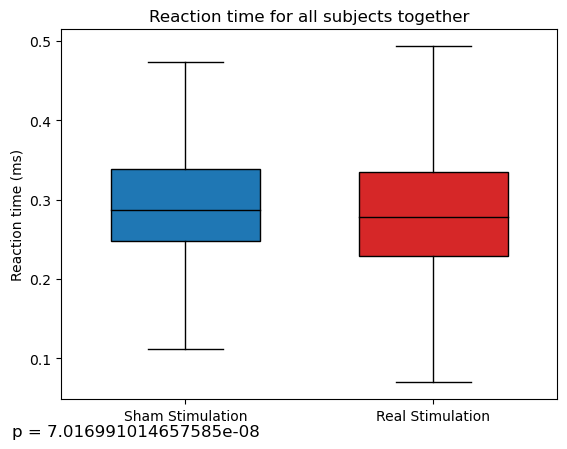

In [74]:
# box plot of RT difference
# for compare_object in compare_objects:

# watch = 'All'
# save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

# create boxplot
# Create a box plot with whiskers
fig, ax = plt.subplots()
boxplots = ax.boxplot([rt_sham, rt_real], patch_artist=True, widths=0.6, showfliers=False)

# Set colors for the box plots
colors = ['#1f77b4', '#d62728']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color to black
for median in boxplots['medians']:
    median.set_color('black')

plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for all subjects together')

# Perform the Mann-Whitney U test
U, p_value = stats.mannwhitneyu(rt_sham, rt_real)

# Add the p-value to the plot
ax.annotate(f'p = {p_value}', # :.4f means 4 decimal places
            xy=(-0.1, -0.1),
            xycoords=('axes fraction', 'axes fraction'),
            ha='left', fontsize=12)
# plt.savefig(save_path, format='png')

plt.show()

## By subjects

In [75]:
compare_objects = ["RT mean shorten", "RT median shorten", "RT mean shorten %", "RT median shorten %"]
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_before = behavior_before[behavior_before['type'] == 1]
    behavior_after = behavior_after[behavior_after['type'] == 1]
    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)


behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_compare = behavior_compare.loc[behavior_compare['RT mean shorten %'] > 0]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT median shorten %,RT std decrease
0,1,1,26.628214,32.1,11.791835,14.612163,-7.347602
2,3,1,25.78851,22.45,10.299667,9.5111,4.288378
3,4,1,-37.53612,-37.835,-15.484511,-17.056622,-26.138183
4,5,1,53.397657,49.365,18.394894,17.255361,-5.961539
8,9,1,31.469608,25.62,9.290195,7.974104,22.54206
11,12,1,-33.359312,-34.27,-13.609261,-14.046809,-16.808381
12,13,1,-34.930981,-40.38,-13.99658,-16.726038,-0.182921
16,17,1,33.741793,37.65,8.814383,10.002391,21.022661
17,18,1,28.86375,33.165,8.970161,10.601605,-1.527265


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT median shorten %,RT std decrease
1,2,0,31.984858,20.08,10.158078,6.671429,30.185825
5,6,0,-11.434906,-9.25,-4.092505,-3.408756,-9.364287
6,7,0,25.427987,26.125,8.595931,9.37758,0.276741
7,8,0,41.908883,48.62,17.072815,19.537874,9.986566
9,10,0,24.0246,19.635,8.510788,7.393392,12.002543
10,11,0,18.894666,12.115,7.090163,4.748373,15.36634
13,14,0,36.5,31.985,10.526457,9.728538,10.629616
14,15,0,12.86243,18.68,3.468254,5.112905,-0.102877
15,16,0,27.488402,22.415,8.762395,7.405266,10.216008


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT median shorten %,RT std decrease
0,1,1,26.628214,32.1,11.791835,14.612163,-7.347602
1,2,0,31.984858,20.08,10.158078,6.671429,30.185825
2,3,1,25.78851,22.45,10.299667,9.5111,4.288378
4,5,1,53.397657,49.365,18.394894,17.255361,-5.961539
6,7,0,25.427987,26.125,8.595931,9.37758,0.276741
7,8,0,41.908883,48.62,17.072815,19.537874,9.986566
8,9,1,31.469608,25.62,9.290195,7.974104,22.54206
9,10,0,24.0246,19.635,8.510788,7.393392,12.002543
10,11,0,18.894666,12.115,7.090163,4.748373,15.36634
13,14,0,36.5,31.985,10.526457,9.728538,10.629616


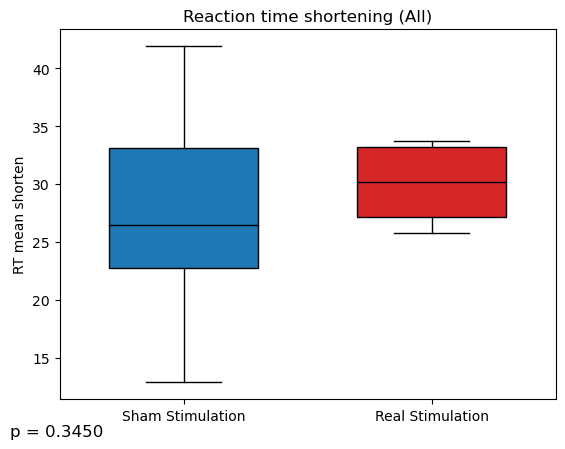

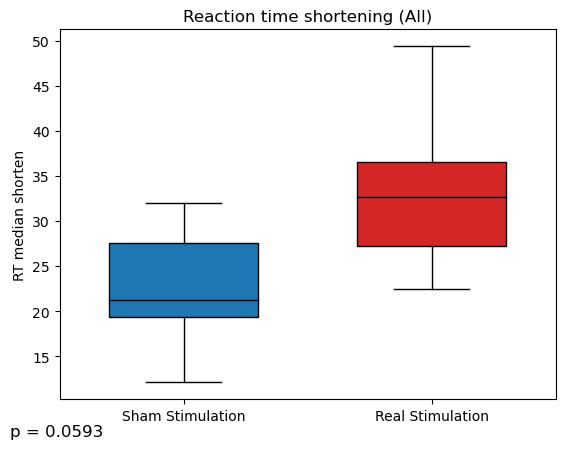

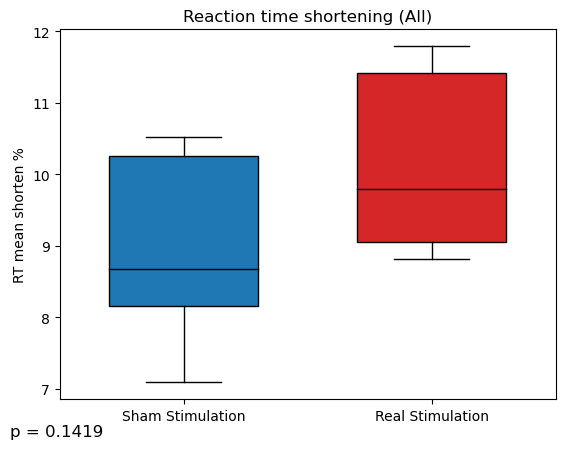

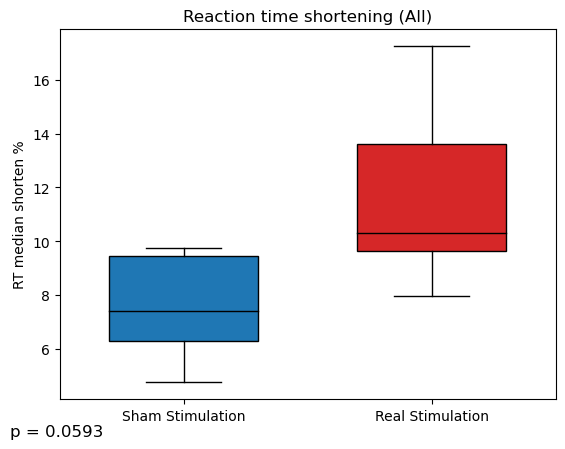

In [76]:
# box plot of RT difference
# compare_objects = ["RT mean shorten %", "RT std decrease"]
for compare_object in compare_objects:
    watch = 'All'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    # plt.savefig(save_path, format='png')

    plt.show()